In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import numpy as np

In [3]:
#see config file for parameter explanations
with open('/home/smocz/expand_redpy/scripts/config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

vv = config['vv']
# vv=2
volc_list_names = config['volc_list_names']
volc = volc_list_names[vv]
print(volc)

readdir = config['readdir']
homedir = config['homedir']
years = config['years']

Hood


In [5]:
#read in csvs

#naming conventions is minsta then delay (wi)
threethree = pd.read_csv(f'{homedir}final_catalogs/{volc}_updated_catalog.csv')
twothree = pd.read_csv(f'{homedir}final_catalogs/{volc}_updated_catalog_minsta2_delay3.csv')
twofive = pd.read_csv(f'{homedir}final_catalogs/{volc}_updated_catalog_minsta2_delay5.csv')
onethree = pd.read_csv(f'{homedir}final_catalogs/{volc}_updated_catalog_minsta1_delay3.csv')

In [47]:
threethree

,Earliest_Detection_Time,Cluster_ID,Stations_Found,Stations,Latitude,Longitude
0,2011-12-04T15:57:50.115000Z,150,3,CC.ASBU CC.SWNB UO.PIN,43.732674,-121.267403
1,2012-09-14T11:54:07.000000Z,1,14,9G.NN07 9G.NN17 9G.NN18 9G.NN19 9G.NN24 9G.NN3...,43.723658,-121.261240
2,2012-09-01T17:30:30.175000Z,2,3,9G.NN18 9G.NN21 9G.NN24,43.737266,-121.307724
3,2012-12-18T23:00:00.725000Z,3,5,CC.NORM CC.SWNB UW.NCO UW.NN17 UW.NN19,43.725982,-121.292256
4,2012-12-19T17:20:47.125000Z,3,4,CC.SWNB UW.NCO UW.NN17 UW.NN19,43.725982,-121.292256
...,...,...,...,...,...,...
617,2021-07-08T18:24:11.900000Z,140,3,CC.NORM CC.SWNB CC.TMBU,43.721282,-121.214714
618,2021-06-03T05:13:43.650000Z,144,5,CC.ASBU CC.CPCO CC.NORM CC.SWNB UW.NN17,43.714584,-121.233364
619,2021-08-01T19:05:12.650000Z,150,3,CC.ASBU CC.SWNB UW.NN17,43.732674,-121.267403
620,2021-03-03T08:37:35.050000Z,162,4,CC.ASBU CC.CPCO CC.TMBU UW.NN17,43.725791,-121.217791


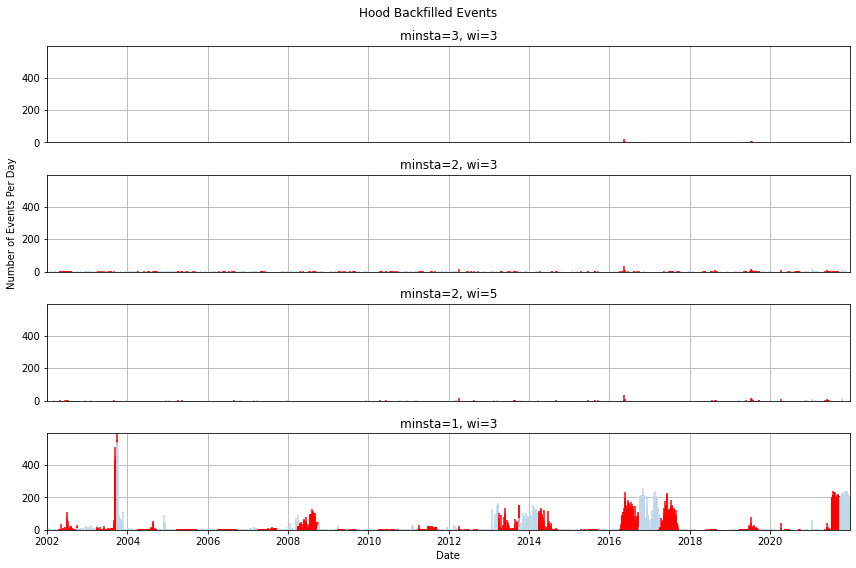

In [9]:
summer_months = list(np.arange(4,10,1)) #apr-sep (winter is then oct-mar)

fig, axs = plt.subplots(nrows=4, ncols=1,figsize = (12,8))

top_y_list = []
date_minmax = []

#for number tests
x_list = []
y_list = []

### misnta3_delay3 (most conservative) ###

#sort data
dates = [str(i).split('T')[0] for i in threethree['Earliest_Detection_Time'].values.tolist()]
x = list(np.unique(dates))
y = [dates.count(i) for i in x]
top_y_list.append(max(y))
date_minmax.append(min(x))
date_minmax.append(max(x))

x_list.append(x)
y_list.append(y)

#plot
for xx,yy in zip(x,y):
    xx = pd.to_datetime(xx)
    if xx.month in summer_months: #if its in summer
        axs[0].vlines(xx,ymin=0,ymax=yy, color='red')
    else: #if its in winter
        axs[0].vlines(xx,ymin=0,ymax=yy, color='#BFD7EA')
        
axs[0].grid(which='major')
axs[0].grid(which='minor',color='#EEEEEE')
axs[0].tick_params(bottom=False, labelbottom = False) 
axs[0].set_title('minsta=3, wi=3')

        
### misnta2_delay3 (moderate) ###

#sort data
dates = [str(i).split('T')[0] for i in twothree['Earliest_Detection_Time'].values.tolist()]
x = list(np.unique(dates))
y = [dates.count(i) for i in x]
top_y_list.append(max(y))
date_minmax.append(min(x))
date_minmax.append(max(x))

x_list.append(x)
y_list.append(y)

#plot
for xx,yy in zip(x,y):
    xx = pd.to_datetime(xx)
    if xx.month in summer_months: #if its in summer
        axs[1].vlines(xx,ymin=0,ymax=yy, color='red')
    else: #if its in winter
        axs[1].vlines(xx,ymin=0,ymax=yy, color='#BFD7EA')
        
axs[1].grid(which='major')
axs[1].grid(which='minor',color='#EEEEEE')
axs[1].tick_params(bottom=False, labelbottom = False) 
axs[1].set_title('minsta=2, wi=3')

### misnta2_delay5 (less moderate) ###

#sort data
dates = [str(i).split('T')[0] for i in twofive['Earliest_Detection_Time'].values.tolist()]
x = list(np.unique(dates))
y = [dates.count(i) for i in x]
top_y_list.append(max(y))
date_minmax.append(min(x))
date_minmax.append(max(x))

x_list.append(x)
y_list.append(y)

#plot
for xx,yy in zip(x,y):
    xx = pd.to_datetime(xx)
    if xx.month in summer_months: #if its in summer
        axs[2].vlines(xx,ymin=0,ymax=yy, color='red')
    else: #if its in winter
        axs[2].vlines(xx,ymin=0,ymax=yy, color='#BFD7EA')
        
axs[2].grid(which='major')
axs[2].grid(which='minor',color='#EEEEEE')
axs[2].tick_params(bottom=False, labelbottom = False) 
axs[2].set_title('minsta=2, wi=5')
        
### misnta1_delay3 (least conservative) ###

#sort data
dates = [str(i).split('T')[0] for i in onethree['Earliest_Detection_Time'].values.tolist()]
x = list(np.unique(dates))
y = [dates.count(i) for i in x]
top_y_list.append(max(y))
date_minmax.append(min(x))
date_minmax.append(max(x))

x_list.append(x)
y_list.append(y)

#plot
for xx,yy in zip(x,y):
    xx = pd.to_datetime(xx)
    if xx.month in summer_months: #if its in summer
        axs[3].vlines(xx,ymin=0,ymax=yy, color='red')
    else: #if its in winter
        axs[3].vlines(xx,ymin=0,ymax=yy, color='#BFD7EA')
        
axs[3].grid(which='major')
axs[3].grid(which='minor',color='#EEEEEE')
axs[3].set_title('minsta=1, wi=3')
        
#set y axis and x axis to same range for all
top_y = max(top_y_list)
min_x = min(date_minmax)
max_x = max(date_minmax)

for ax in axs:
    ax.set_ylim(bottom=0,top=top_y)
    ax.set_xlim(left=pd.to_datetime(min_x),right=pd.to_datetime(max_x))
    
plt.suptitle(f'{volc} Backfilled Events')
axs[1].set_ylabel('Number of Events Per Day')
plt.xlabel('Date')
plt.tight_layout()

In [49]:
if x_list[1] == x_list[2]:
    print('no difference')
    
print(len(x_list[1]), len(x_list[2]))

print(f'minsta=2 wi=5 has {len(x_list[2])-len(x_list[1])} more events than minsta=2 wi=3 on {volc}')

no difference
576 576
minsta=2 wi=5 has 0 more events than minsta=2 wi=3 on Newberry


In [50]:
if x_list[0] == x_list[1]:
    print('no difference')
    
print(len(x_list[0]), len(x_list[1]))

print(f'minsta=2 wi=3 has {len(x_list[1])-len(x_list[0])} more events than minsta=3 wi=3 on {volc}')

314 576
minsta=2 wi=3 has 262 more events than minsta=3 wi=3 on Newberry
